<a href="https://colab.research.google.com/github/cmendel1221/cmendel/blob/main/Research_Question_1_(afc_health)_Ciara_Mendel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Age of Cigarette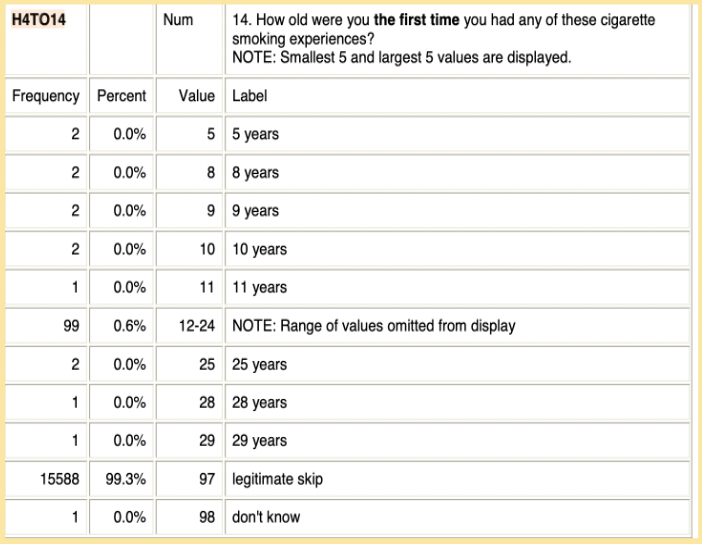

In [19]:
df['afc'] = df['H4TO14']
df['afc'] = pd.to_numeric( df['afc'] , errors ='coerce')
df['afc'] = df['afc'].loc[ df['afc'] < 97]
df['afc'].describe()

count    32.000000
mean     17.000000
std       3.680813
min       8.000000
25%      15.000000
50%      16.500000
75%      18.000000
max      29.000000
Name: afc, dtype: float64

<Axes: xlabel='afc', ylabel='Count'>

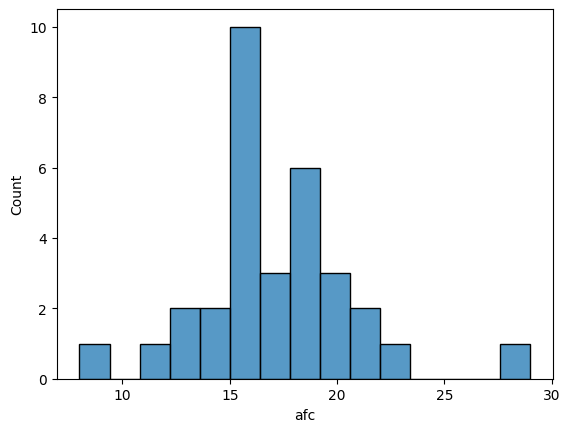

In [20]:
sns.histplot(x = 'afc' , data = df, bins= 15)

<Axes: xlabel='afc'>

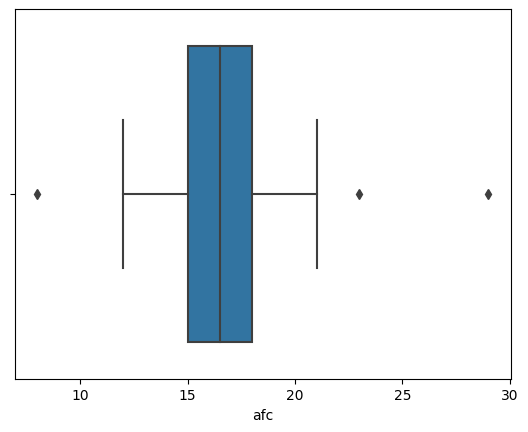

In [21]:
sns.boxplot(x = 'afc' , data = df)

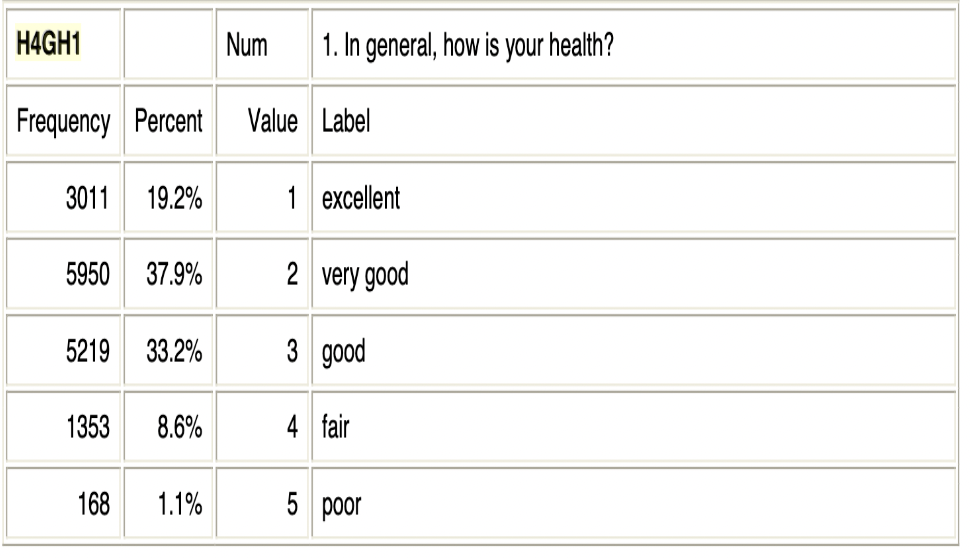

In [22]:
df['health'] = df['H4GH1']
df['health'] = df['health'].loc[df['health'] !=' ' ]

df['health'].value_counts()

2    1963
3    1683
1     979
4     434
5      55
Name: health, dtype: int64

In [23]:
df['health'].replace(['1','2','3','4','5'],['excellent','very good','good','fair','poor'], inplace = True)
df['health'].value_counts()

very good    1963
good         1683
excellent     979
fair          434
poor           55
Name: health, dtype: int64

<Axes: ylabel='health'>

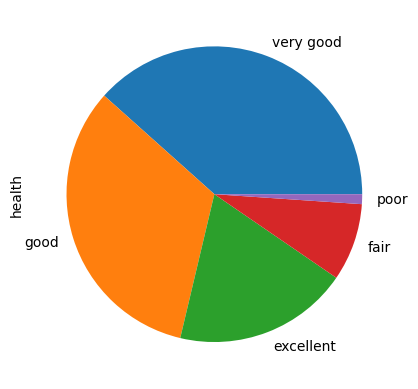

In [24]:
df['health'].value_counts().plot(kind ='pie')

In [25]:
df.groupby('health')['afc'].agg(['mean','std']).round(2)

,mean,std
health,,
excellent,18.00,2.55
fair,16.25,1.83
good,15.00,3.10
poor,NaN,NaN
very good,20.57,4.43


<Axes: xlabel='afc', ylabel='health'>

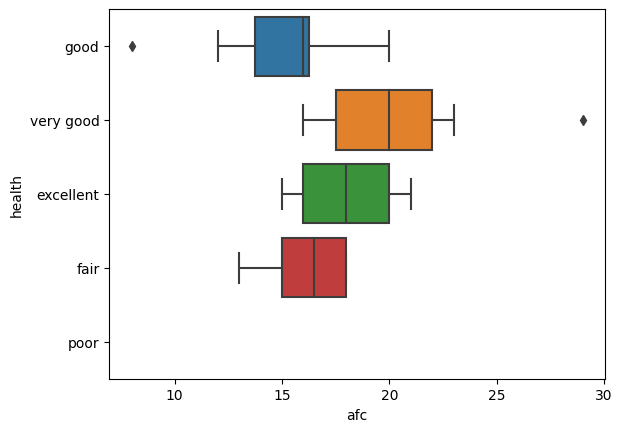

In [10]:
sns.boxplot(y = 'health' , x ='afc' , data = df)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
model = ols('afc ~ C(health)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(health),4.0,153.477532,38.369383,3.932235,0.011754
Residual,28.0,273.214286,9.757653,NaN,NaN


In [13]:
import statsmodels.stats.multicomp as multi

In [14]:
sub = df[['afc','health']].dropna() 
mc1 = multi.MultiComparison(sub['afc'], sub['health'])
res = mc1.tukeyhsd()
print(res.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
excellent      fair    -1.75 0.7603 -6.6121 3.1121  False
excellent      good     -3.0 0.2926 -7.5398 1.5398  False
excellent very good   2.5714 0.5063 -2.4225 7.5653  False
     fair      good    -1.25 0.8168 -5.1428 2.6428  False
     fair very good   4.3214 0.0567 -0.0926 8.7355  False
     good very good   5.5714 0.0043  1.5152 9.6277   True
---------------------------------------------------------


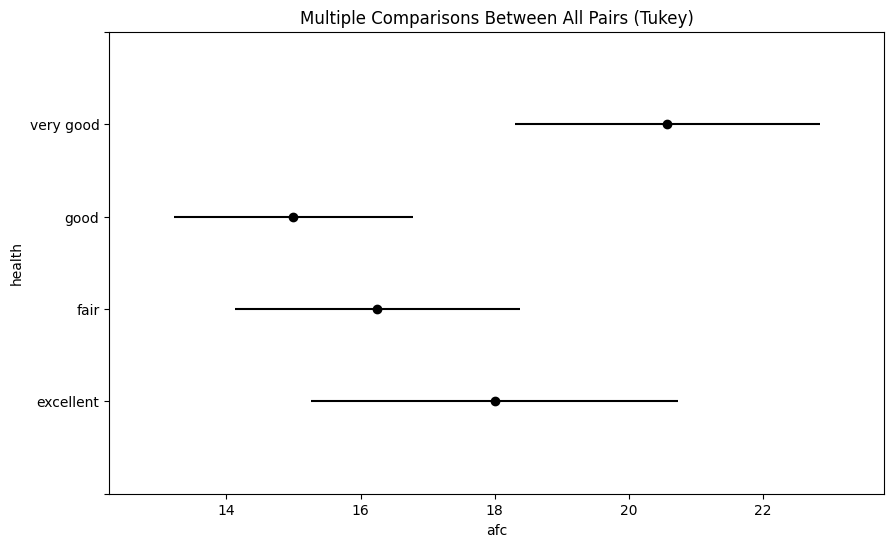

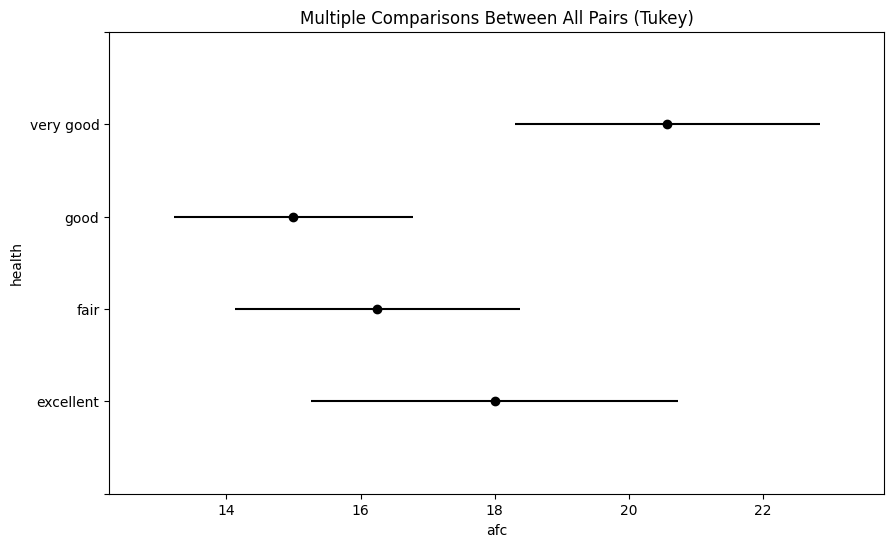

In [15]:
res.plot_simultaneous(ylabel= "health", xlabel= "afc")